In [6]:
import cv2
import numpy as np
import pylab as pl

In [7]:
def build_filters():
     filters = []
     ksize = [7,9,11,13,15,17] # gabor尺度，6个
     lamda = np.pi/2.0 #波长
     for theta in np.arange(0, np.pi, np.pi / 4): #gabor方向，0°，45°，90°，135°，共四个
         for K in xrange(6): 
             kern = cv2.getGaborKernel((ksize[K], ksize[K]), 1.0, theta, lamda, 0.5, 0, ktype=cv2.CV_32F)
             kern /= 1.5*kern.sum()
             filters.append(kern)
     return filters

In [8]:
###    Gabor滤波过程
def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum

In [9]:
###    Gabor特征提取
def getGabor(img,filters):
    res = [] #滤波结果
    for i in xrange(len(filters)):        
        res1 = process(img, filters[i])
        res.append(np.asarray(res1))

    pl.figure(2)
    for temp in xrange(len(res)):
        pl.subplot(4,6,temp+1)
        pl.imshow(res[temp], cmap='gray' )
    pl.show()

    return res  #返回滤波结果,结果为24幅图，按照gabor角度排列

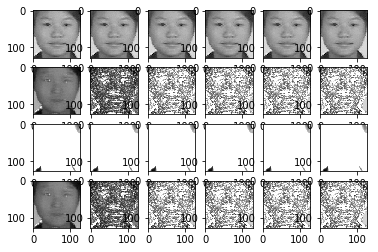

In [20]:
if __name__ != 'main':
    img = cv2.imread('256.jpg')
    img = cv2.resize(img, (128,128))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    filters = build_filters()
    res = getGabor(img, filters)

In [18]:
filters

[array([[ 0.00235158, -0.00493959, -0.09945135,  0.2508516 , -0.09945135,
         -0.00493959,  0.00235158],
        [ 0.00439332, -0.00922837, -0.18579958,  0.46865252, -0.18579958,
         -0.00922837,  0.00439332],
        [ 0.00639225, -0.0134272 , -0.27033678,  0.68188536, -0.27033678,
         -0.0134272 ,  0.00639225],
        [ 0.00724336, -0.01521501, -0.30633172,  0.77267736, -0.30633172,
         -0.01521501,  0.00724336],
        [ 0.00639225, -0.0134272 , -0.27033678,  0.68188536, -0.27033678,
         -0.0134272 ,  0.00639225],
        [ 0.00439332, -0.00922837, -0.18579958,  0.46865252, -0.18579958,
         -0.00922837,  0.00439332],
        [ 0.00235158, -0.00493959, -0.09945135,  0.2508516 , -0.09945135,
         -0.00493959,  0.00235158]], dtype=float32),
 array([[ -3.18475104e-05,   9.29313654e-04,  -1.95206515e-03,
          -3.93019393e-02,   9.91334468e-02,  -3.93019393e-02,
          -1.95206515e-03,   9.29313654e-04,  -3.18475104e-05],
        [ -7.63981952e-